# A Text Classification for Spam Detection

## Marketing Email Analysis and PredictionProject Description:
A marketing company wants to make an internal spam email detection so that before sending any email they can findout if the email will be considered as spam or not.
They need to find the words which are the cause for detecting an email as spam. And which words can be useful to be identified as ham (not spam) emails only.


## Problem Statement:
Detect Spam Emails (create a text classification model that detects spam email) include the inference function and test it out.
Make a worcloud for spam emails and ham emails (safe) and see if any words stand out in either category
Give the stake holders a list of terms that they can avoid adding to their emails to prevent their marketing emails going into the spam box of their customers


In [ ]:
!pip install wordcloud

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## read|load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data =pd.read_csv('/content/drive/MyDrive/Classroom/Email_spam_classification_file.csv')

data.head(5)


,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [ ]:
data.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [ ]:
data.shape

(84, 3)

#converting letters to numbers

In [ ]:
  from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

data["type"]=encoder.fit_transform(data["type"])

In [ ]:
unique_values = data["type"].unique()

print(unique_values)

[1 0]


In [ ]:
data.head(5)

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",1
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",0
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",0
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",0
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",1


In [ ]:
##spam no 1
##not spam no 2

## Data Pre-Processing(cleaning and normalizing)

In [ ]:
# !pip install nltk
import nltk

In [ ]:
nltk.download('punkt')

data["num_characters"]=data["text"].apply(len)

data["word_count"]=data["text"].apply(lambda x:len(nltk.word_tokenize(x)))

data["sent_count"]=data["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data.head()

,title,text,type,num_characters,word_count,sent_count
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",1,302,63,5
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",0,350,64,2
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",0,166,31,2
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",0,399,71,5
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",1,6079,1264,67


In [ ]:
data[data["type"]==0][["num_characters","word_count","sent_count"]].describe()

data[data["type"]==1][["num_characters","word_count","sent_count"]].describe()



,num_characters,word_count,sent_count
count,26.000000,26.000000,26.000000
mean,746.461538,151.846154,9.000000
std,1157.525092,240.152234,12.572987
min,19.000000,3.000000,1.000000
25%,184.250000,40.750000,4.000000
50%,530.500000,110.500000,6.500000
75%,799.250000,153.750000,9.750000
max,6079.000000,1264.000000,67.000000


from matplotlib import pyplot as plt
_df_0['num_characters'].plot(kind='hist', bins=20, title='num_characters')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['word_count'].plot(kind='hist', bins=20, title='word_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sent_count'].plot(kind='hist', bins=20, title='sent_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='num_characters', y='word_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='word_count', y='sent_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['num_characters'].plot(kind='line', figsize=(8, 4), title='num_characters')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['word_count'].plot(kind='line', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['sent_count'].plot(kind='line', figsize=(8, 4), title='sent_count')
plt.gca().spines[['top', 'right']].set_visible(False)

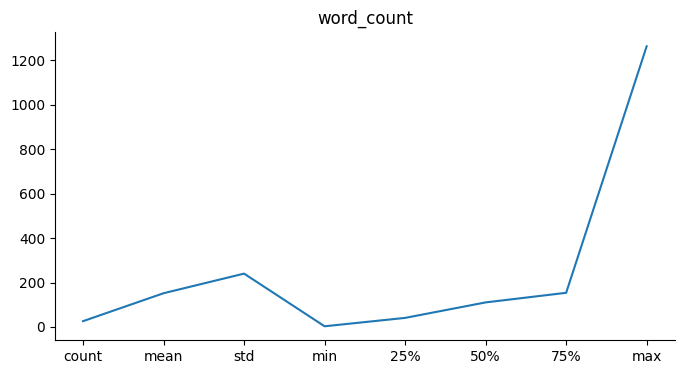

In [ ]:
from matplotlib import pyplot as plt
_df_6['word_count'].plot(kind='line', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.corr()

<ipython-input-24-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,type,num_characters,word_count,sent_count
type,1.000000,-0.067525,-0.027425,0.022007
num_characters,-0.067525,1.000000,0.992237,0.917025
word_count,-0.027425,0.992237,1.000000,0.943908
sent_count,0.022007,0.917025,0.943908,1.000000


from matplotlib import pyplot as plt
_df_8['type'].plot(kind='hist', bins=20, title='type')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['num_characters'].plot(kind='hist', bins=20, title='num_characters')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['word_count'].plot(kind='hist', bins=20, title='word_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['sent_count'].plot(kind='hist', bins=20, title='sent_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='type', y='num_characters', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='num_characters', y='word_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='word_count', y='sent_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sent_count']
  ys = series['type']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('sent_count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sent_count')
_ = plt.ylabel('type')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sent_count']
  ys = series['num_characters']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('sent_count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sent_count')
_ = plt.ylabel('num_characters')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sent_count']
  ys = series['word_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('sent_count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sent_count')
_ = plt.ylabel('word_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sent_count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sent_count'}, axis=1)
              .sort_values('sent_count', ascending=True))
  xs = counted['sent_count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('sent_count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sent_count')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_19['type'].plot(kind='line', figsize=(8, 4), title='type')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['num_characters'].plot(kind='line', figsize=(8, 4), title='num_characters')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['word_count'].plot(kind='line', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['sent_count'].plot(kind='line', figsize=(8, 4), title='sent_count')
plt.gca().spines[['top', 'right']].set_visible(False)

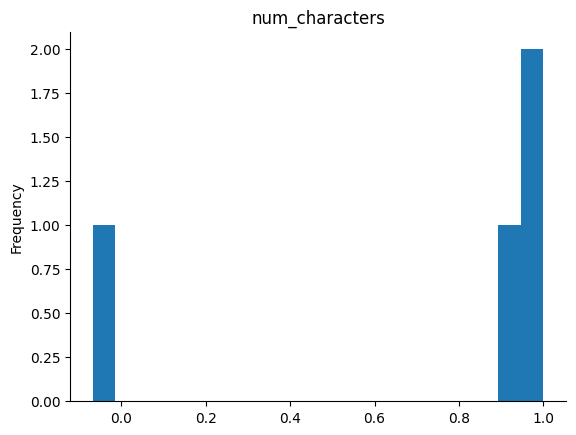

In [ ]:
from matplotlib import pyplot as plt
_df_9['num_characters'].plot(kind='hist', bins=20, title='num_characters')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-25-6c41129e838b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


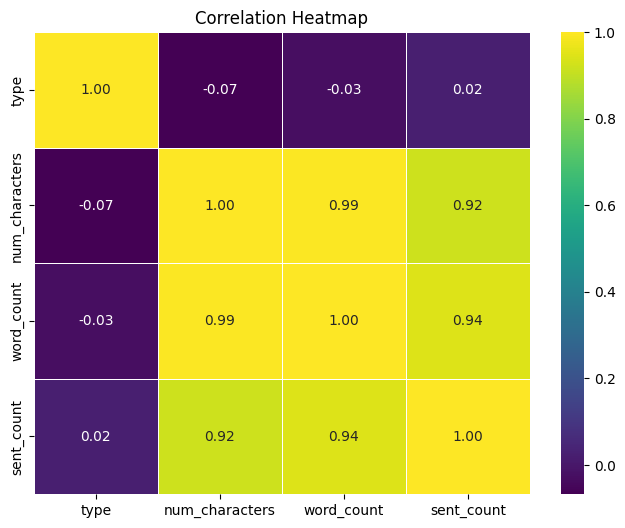

In [ ]:
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words1 = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
      if i.isalnum():
        y.append(i)
    text = y[:]
    y.clear()
    for i in text:
      if i not in stop_words1 and i not in string.punctuation:
        y.append(i)
        from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()
    z=[]
    for i in y:
      z.append(ps.stem(i))

    return " ".join(z)

In [ ]:
transform("Hi @ my name is! mwangi and i am a techsage in . ")


'hi name mwangi techsag'

In [ ]:
data["transformed_text"]=data["text"].apply(transform)
data.head()

,title,text,type,num_characters,word_count,sent_count,transformed_text
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",1,302,63,5,hi jame claim complimentari gift yet compil sp...
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",0,350,64,2,congratul earn 500 complet follow offer view p...
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",0,166,31,2,github launch code mortyj420 octocat stand nex...
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",0,399,71,5,hello thank contact virtual reward center virt...
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",1,6079,1264,67,hey prachanda rawal today newslett everyth nee...


In [ ]:
#word cloud
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color="grey")

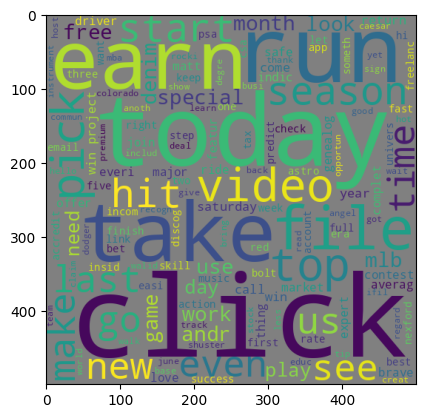

In [ ]:
spam_wc = wc.generate(data[data["type"]==1]["transformed_text"].str.cat(sep=" "))
plt.imshow(spam_wc)

In [ ]:
from collections import Counter

In [ ]:
# Extract words from spam messages
spam_corpus = []
for sen in data[data["type"] == 1]["transformed_text"].tolist():
    for word in sen.split():
        spam_corpus.append(word)

In [ ]:
# Create a Counter to count word occurrences
word_counts = Counter(spam_corpus)

In [ ]:
# Get the top 30 words and their counts
top_words_data = {"Word": [], "Count": []}
for word, count in word_counts.most_common(30):
    top_words_data["Word"].append(word)
    top_words_data["Count"].append(count)

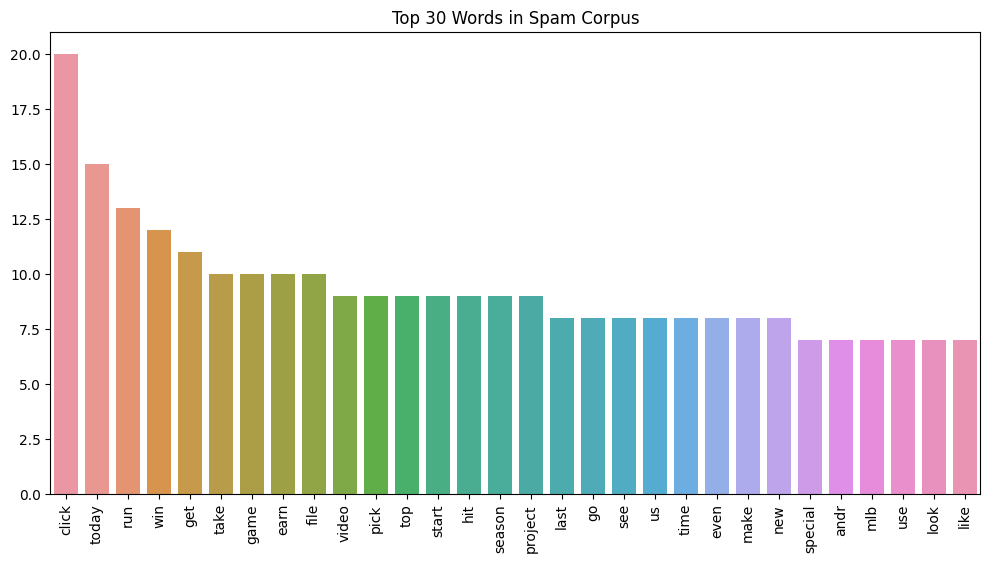

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Word", y="Count", data=top_words_data)
plt.xticks(rotation="vertical")
plt.title("Top 30 Words in Spam Corpus")
plt.show()

 """**MODEL BUILDING**"""

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
# TF-IDF Vectorization
cv = TfidfVectorizer(max_features=100000)
x = cv.fit_transform(data["transformed_text"]).toarray()
y = data["type"].values

In [ ]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
# Multinomial Naive Bayes model training
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# Model evaluation on the test set
predict_mnb = mnb.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predict_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, predict_mnb))
print("Precision:", precision_score(y_test, predict_mnb))

Accuracy: 0.7058823529411765
Confusion Matrix:
 [[12  0]
 [ 5  0]]
Precision: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# New sentence for testing
sentence = "Congratulations! You've won a free cruise. Click the link to claim your prize."

In [ ]:
# Transform the new sentence using the same vectorizer
final_1 = cv.transform([sentence]).toarray()

In [ ]:
# Make a prediction using the trained Multinomial Naive Bayes model
predict_gnb = mnb.predict(final_1)

In [ ]:
# Print the result
if predict_gnb[0] == 0:
    result = "NOT A SPAM"
else:
    result = "SPAM!!!"

In [ ]:
print(result)

NOT A SPAM


In [ ]:
# Print the evaluation metrics
print("Accuracy:", accuracy_score(y_test, predict_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, predict_mnb))
print("Precision:", precision_score(y_test, predict_mnb))

Accuracy: 0.7058823529411765
Confusion Matrix:
 [[12  0]
 [ 5  0]]
Precision: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print the first prediction
print(predict_mnb[0])

0


In [ ]:
bnb.fit(x_train,y_train)
predict_gnb = bnb.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predict_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, predict_mnb))
print("Precision:", precision_score(y_test, predict_mnb))


Accuracy: 0.7058823529411765
Confusion Matrix:
 [[12  0]
 [ 5  0]]
Precision: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle
pickle.dump(cv, open("TfidfVectorizer.pkl", "wb"))
pickle.dump(mnb, open("spam_detector.pkl", "wb"))

